##### Proyecto Netflix

### Objetivo
<p> El objetivo es aplicar técnicas de manipulación y visualización de datos para responder preguntas concretas sobre las películas estrenadas en la década de 1990.</p>

In [1]:
import pandas as pd

<p>Importo el archivo</p>

In [2]:
netflix = pd.read_csv("netflix.csv")
#Columnas del archivo
netflix.columns

Index(['index', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'duration', 'description', 'genre'],
      dtype='object')

<p>Reviso si el archivo contiene valores nulo</p>

In [3]:
netflix.isna().sum()

index           0
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

##### ¿Cual es la duración mas frecuente en las peliculas de la decada de 1990?
<p>Filtro las peliculas cuyo release_year este entre 1990 y 1999</p>

In [ ]:
decade_90 = netflix[(netflix["release_year"] >= 1990) & (netflix["release_year"]<=1999)]
decade_90.head(3)             

,index,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies


<p>Duracion de Peliculas</p>

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

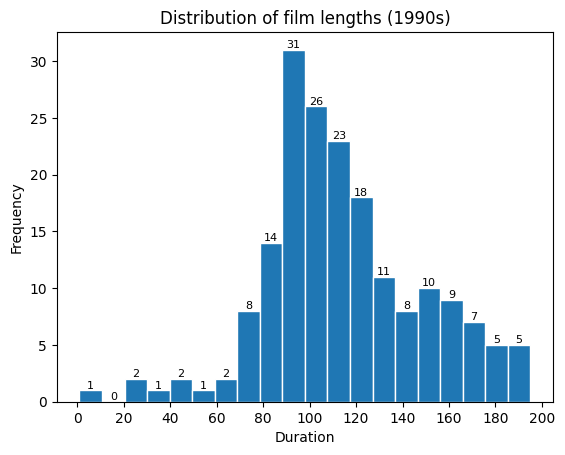

¿Cuál fue la duración más frecuente de una película en la década de 1990? 
Respuesta: 94 minutos


In [6]:
n, bins, patches = plt.hist(decade_90["duration"].dropna(),bins=20,edgecolor="white")

# Titulos gráficos y eje
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Distribution of film lengths (1990s)")

# Ajustar ticks del eje x cada 20 minutos
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))

#Agregar etiquetas encima de cada barra
for i in range(len(n)):
    #Posición x: El centro de la barra
    x =(bins[i]+bins[i+1])/2
    #Posición y: La altura de la barra
    y =n[i]
    plt.text(x,y,str(int(y)),ha="center",va="bottom",fontsize=8)

plt.show()
duration = decade_90["duration"].mode()[0]
print(f"¿Cuál fue la duración más frecuente de una película en la década de 1990? \nRespuesta: {duration} minutos")

##### Una película se considera corta si dura menos de 90 minutos. Número de cortometrajes de acción estrenados en la década de 1990 

In [7]:
decade_90.columns

Index(['index', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'duration', 'description', 'genre'],
      dtype='object')

<p>Generos de peliculas:</p>

In [18]:
decade_90["genre"].unique()

array(['Dramas', 'Comedies', 'Children', 'Action', 'Documentaries',
       'Classic Movies', 'Stand-Up', 'Cult Movies', 'Thrillers',
       'Horror Movies', 'Docuseries'], dtype=object)

<p>Creo un dataframe con las peliculas de accion de la decada de los '90</p>

In [19]:
decade_90_action = decade_90[decade_90["genre"]=="Action"]
decade_90_action.shape
decade_90_action.columns

Index(['index', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'duration', 'description', 'genre'],
      dtype='object')

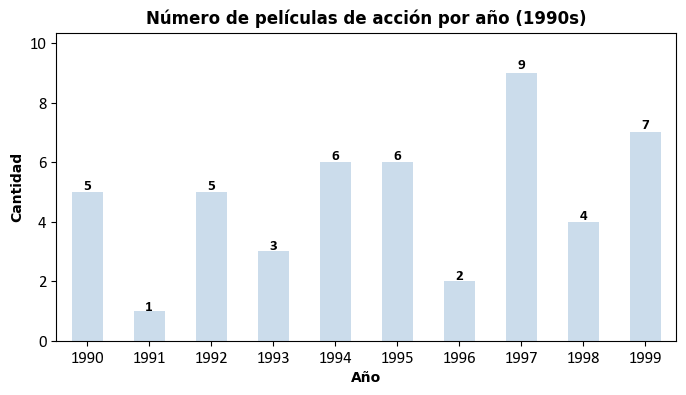

In [30]:
ax = decade_90_action.groupby("release_year")["title"].count().plot(kind="bar", figsize=(8,4),color='#CBDCEB')

# Calculamos el valor máximo de la cantidad de películas
counts = decade_90_action.groupby("release_year")["title"].count()
max_count = counts.max()
ax.set_ylim(0, max_count * 1.15)

#Valores de las barras
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height() * 1.015),
                ha='center', fontname='calibri', fontsize=11,fontweight='bold')

plt.title("Número de películas de acción por año (1990s)",fontweight='bold')
plt.xlabel("Año",fontweight='bold')
plt.ylabel("Cantidad",fontweight='bold')

# Personalizar los ticks (números de los ejes)
plt.xticks(rotation=0, fontname='calibri', fontsize=12)
plt.yticks(fontname='calibri', fontsize=12)

# Ajustar el diseño y mostrar el gráfico
plt.show()

In [10]:
short_movie_count = int((decade_90_action["duration"]<90).sum())
print(f"Películas de acción de la decada '90 con duración < 90 minutos: {short_movie_count}")
total_accion = decade_90_action.shape[0]
print(f"Total películas de acción de la decada '90: {total_accion}")
porcentaje = (short_movie_count/total_accion)*100
print(f"porcentaje corta duración: {porcentaje:.0f}%")

Películas de acción de la decada '90 con duración < 90 minutos: 7
Total películas de acción de la decada '90: 48
porcentaje corta duración: 15%


<p>Gráfico de tendencia de películas por año en los 90s</p>

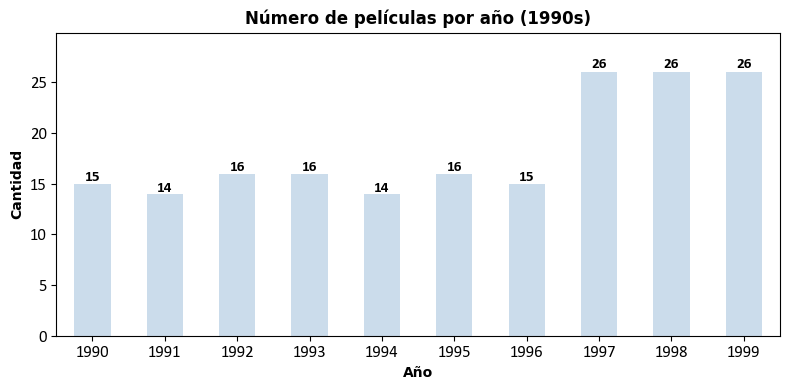

In [28]:
ax = decade_90.groupby("release_year")["title"].count().plot(kind="bar", figsize=(8,4),color='#CBDCEB')

# Calculamos el valor máximo de la cantidad de películas
counts = decade_90.groupby("release_year")["title"].count()
max_count = counts.max()
ax.set_ylim(0, max_count * 1.15)

#Valores de las barras
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height() * 1.015),
                ha='center', fontname='calibri', fontsize=11,fontweight='bold')

plt.title("Número de películas por año (1990s)",fontweight='bold')
plt.xlabel("Año",fontweight='bold')
plt.ylabel("Cantidad",fontweight='bold')

# Personalizar los ticks (números de los ejes)
plt.xticks(rotation=0, fontname='calibri', fontsize=12)
plt.yticks(fontname='calibri', fontsize=12)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


<p>Cantidad de películas por país</p>

In [12]:
title_by_country = decade_90.groupby("country")["title"].agg(["count"])
title_by_country

,count
country,
Argentina,1
Australia,5
Canada,1
Egypt,1
France,5
Germany,2
Hong Kong,11
India,34
Japan,2


<p>Duración promedio por año</p>

In [13]:
round(decade_90.groupby("release_year")["duration"].mean(),2)

release_year
1990    109.67
1991     93.50
1992    104.00
1993    120.00
1994    128.43
1995    116.44
1996    120.13
1997    116.96
1998    109.88
1999    121.88
Name: duration, dtype: float64

<p>Múltiples agregaciones</p>

In [14]:
round(decade_90.groupby("country")["duration"].agg(["count","mean","min","max"]),2)

,count,mean,min,max
country,,,,
Argentina,1,81.00,81,81
Australia,5,102.60,93,120
Canada,1,31.00,31,31
Egypt,1,130.00,130,130
France,5,112.80,94,136
Germany,2,89.50,85,94
Hong Kong,11,94.36,79,125
India,34,162.85,126,193
Japan,2,78.00,69,87


<p>Agrupación por más de una columna</p>

In [15]:
decade_90.groupby(["release_year","country"])["title"].agg(["count"])

count
release_year country              
1990         Australia           1
             Hong Kong           1
             India               4
             Poland              1
             United States       8
1991         France              1
             India               1
             Mexico              1
             United Kingdom      2
             United States       9
1992         Australia           2
             Hong Kong           3
             India               1
             Mexico              1
             United Kingdom      3
             United States       6
1993         France              1
             Hong Kong           2
             India               3
             United Kingdom      1
             United States       9
1994         Egypt               1
             Hong Kong           1
             India               4
             United Kingdom      2
             United States       6
1995         Hong Kong           2
             India               4
             United Kingdom      1
             United States       9
1996         India               3
             United Kingdom      1
             United States      11
1997         France              1
             Hong Kong           2
             India               3
             Japan               1
             United Kingdom      3
             United States      16
1998         Argentina           1
             Australia           2
             Canada              1
             India               5
             Japan               1
             United Kingdom      2
             United States      14
1999         France              2
             Germany             2
             India               6
             Mexico              1
             Thailand            1
             United Kingdom      2
             United States      12

<p>Top 5 países con más películas</p>

In [16]:
decade_90.groupby("country")["title"].count().sort_values(ascending=False).head(5)


country
United States     100
India              34
United Kingdom     17
Hong Kong          11
Australia           5
Name: title, dtype: int64